In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns

In [0]:
data = sns.load_dataset("iris")
data = data.iloc[:,[0,1,4]]

In [0]:
species_num = []
for i in data.species.values:
    if i=="setosa":
        species_num.append(0)
    elif i=="versicolor":
        species_num.append(1)
    else :#virginica
        species_num.append(2)
        
data["species"] = species_num

In [0]:
data.head()

,sepal_length,sepal_width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [0]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [0]:
x.shape

(150, 2)

In [0]:
y.shape

(150,)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=9)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)       #sqrt(120) ~ 11

In [0]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score


In [0]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [0]:
accuracy = []
for i in range(1,int(len(y_train)/4)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))


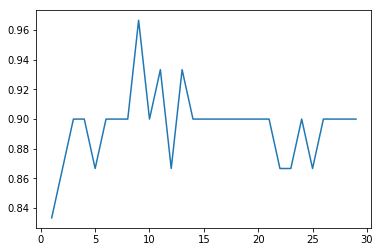

In [0]:
plt.plot(range(1,int(len(y_train)/4)),accuracy)

In [0]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
accuracy_score(y_test,knn.predict(x_test))

0.9

In [0]:
from numpy import meshgrid

In [0]:
a = np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01)
b = np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01)


xx,yy=np.meshgrid(a,b)

In [0]:
input_array = np.array([xx.ravel(),yy.ravel()]).T
input_array

array([[3.3 , 1.  ],
       [3.31, 1.  ],
       [3.32, 1.  ],
       ...,
       [8.87, 5.39],
       [8.88, 5.39],
       [8.89, 5.39]])

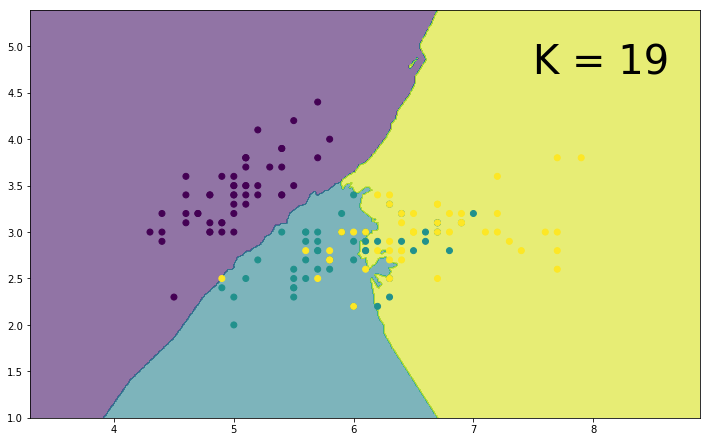

In [0]:
k = 19
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x,y)
plt.figure(figsize=(12, 7.5))
plt.contourf(xx,yy,knn.predict(input_array).reshape(xx.shape),alpha=0.6)
plt.scatter(x[:,0],x[:,1],c=y)

plt.text(7.5, 4.7, ("K = " + str(k)), fontsize=40)
plt.show()
plt.close()
#plt.savefig('decision_boundary_diagram.jpg',dpi=1200,bbox_inches = 'tight')          #remove the "#" from the first of this line to save the plot as jpg file


In [0]:
from datetime import datetime
print(datetime.now())

2019-10-20 20:44:36.661683
